In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>


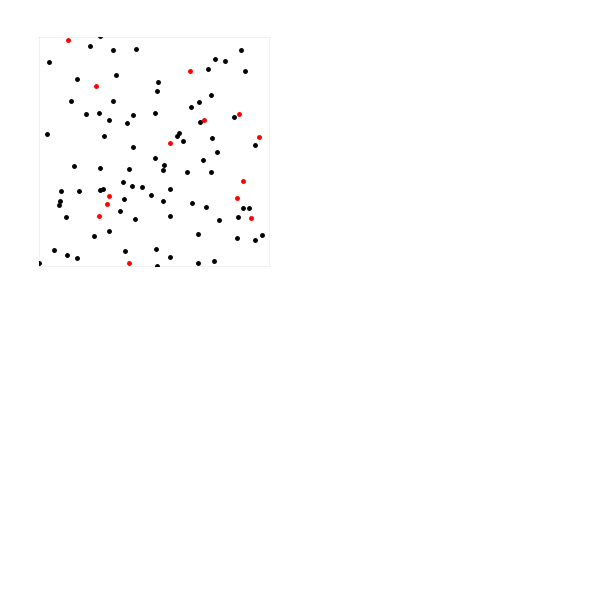

<IPython.core.display.Javascript object>


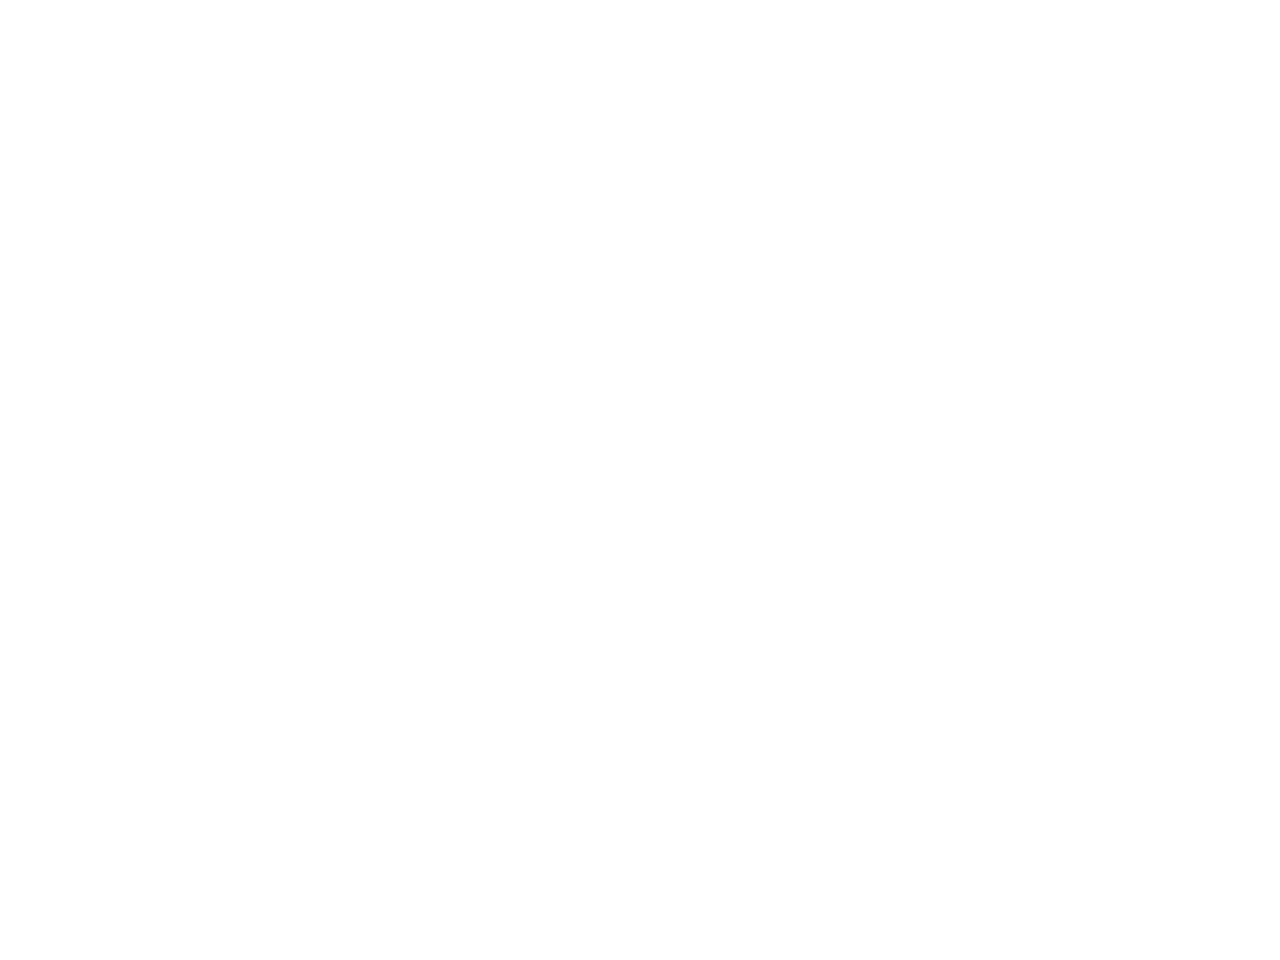

Text(0, 0.5, 'Estimate of the number of turtles')

In [3]:
%matplotlib notebook

n_animals = 100
n_steps = 200
vmin = 0.01
vmax = 0.05
trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)

# Capture
color = np.where(np.logical_and(x<trap_size , y<trap_size), 1, 0) # All captured are color1, all free ones are color0
n_marked = np.sum(color)

estimation = np.zeros(n_steps) # At every point in time
                                # .. we'll remember the estimation for N an ecologist could have made 

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for t in range(n_steps):
    # Moving elks around
    x += vx
    y += vy
    
    vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
    vy = np.where(np.logical_or(y>1,y<0), -vy , vy)
    
    # Recapture
    n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
    n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
    estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator
    
    ax.clear()
    plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
    plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw() # <--------------- The main command to make it move
    #time.sleep(0.5)
    
plt.figure()
plt.plot(estimation)
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles')

<IPython.core.display.Javascript object>


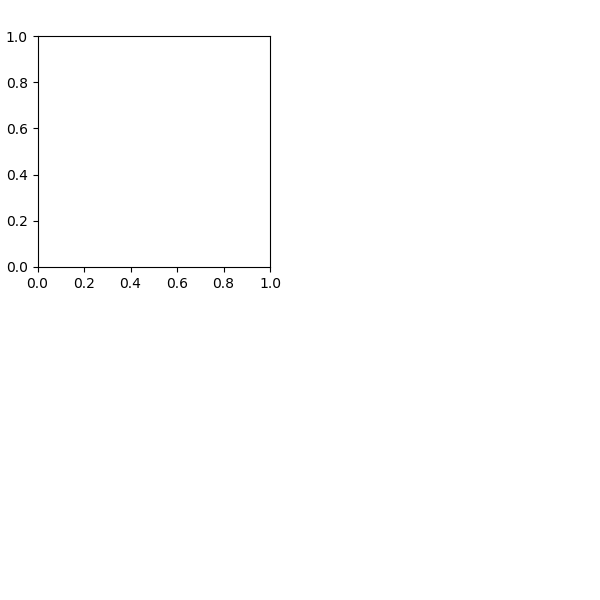

ValueError: operands could not be broadcast together with shapes (2,) (2,100) 

In [12]:
%matplotlib notebook

n_animals = 100
n_steps = 2
vmin = 0.01
vmax = 0.05
trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"
#trap_size2 = np.random.uniform(size=n_steps, low =(trap_size/4)+trap_size, high=(trap_size/4)-trap_size)

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)

# Capture
color = np.where(np.logical_and(x<trap_size , y<trap_size), 1, 0) # All captured are color1, all free ones are color0
n_marked = np.sum(color)

#2nd model
color2 = np.where(np.logical_and(x<(trap_size/4)+trap_size , y<(trap_size/4)-trap_size), 2, 0) # All captured are color1, all free ones are color0
n_marked2 = np.sum(color2)

estimation = np.zeros(shape=(n_steps, n_animals)) # At every point in time the estimation for N an ecologist
                            
#history of estimate
hist_estimate = np.zeros(n_steps)
hist_estimate2 = np.zeros(n_steps) #second hist

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()


for t in range(n_steps): #loop through 
    for t in range(n_steps):
        # Moving elks around
        x += vx
        y += vy

        vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
        vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

        # Recapture
        n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
        n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
        estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator
        
        n_recaptured_total2 = np.sum(np.logical_and(x<trap_size, y<trap_size))
        n_recaptured_marked2 = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
        estimation[t] = (n_marked2+1)/(n_recaptured_marked2+1)*(n_recaptured_total2)-1 # Chapman estimator
        
        #est_hist
        hist_estimate = (hist_estimate+estimation)/n_steps #border
        hist_estimate2 = (hist_estimate2+estimation2)/n_steps #center
        ax.clear()
        plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
        plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.canvas.draw() # <--------------- The main command to make it move
        #time.sleep(0.5)
    


plt.figure()
plt.plot(hist_estimate)
plt.xlabel('Time')
plt.ylabel('Estimate of the number of animals')
plt.title('Average Estimate vs Time: Border Trapped');


plt.figure()
plt.plot(hist_estimate2)
plt.xlabel('Time')
plt.ylabel('Estimate of the number of animals')
plt.title('Average Estimate vs Time: Center Trapped');


Originally, I predicted that it would be better to capture the animals from the middle of the field, since there would be more foot traffic from the animals. I had diffuclty modeling the projection for trapping in the middle of the graph. I recieved lots of error for the equations that I tried to input and so now my next goal is to determine where my error occured. I had orginsllly succeded in simply creating a graph of the histories.

In [ ]:
%matplotlib notebook

n_animals = 100
n_steps = 200
vmin = 0.01
vmax = 0.05
trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)

# Capture
color = np.where(np.logical_and(x<trap_size , y<trap_size), 1, 0) # All captured are color1, all free ones are color0
n_marked = np.sum(color)

estimation = np.zeros(n_steps) # At every point in time
                                # .. we'll remember the estimation for N an ecologist could have made 

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for t in range(n_steps): #loop through 
    for t in range(n_steps):
        # Moving elks around
        x += vx
        y += vy

        vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
        vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

        # Recapture
        n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
        n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
        estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator

        hist_estimate = (hist_estimate+estimation)/n_steps #border
        
        ax.clear()
        plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
        plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.canvas.draw() # <--------------- The main command to make it move
        #time.sleep(0.5)
    
plt.figure()
plt.plot(estimation)
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles')
plt.title('Average Estimate vs Time: Center Trapped');

<IPython.core.display.Javascript object>


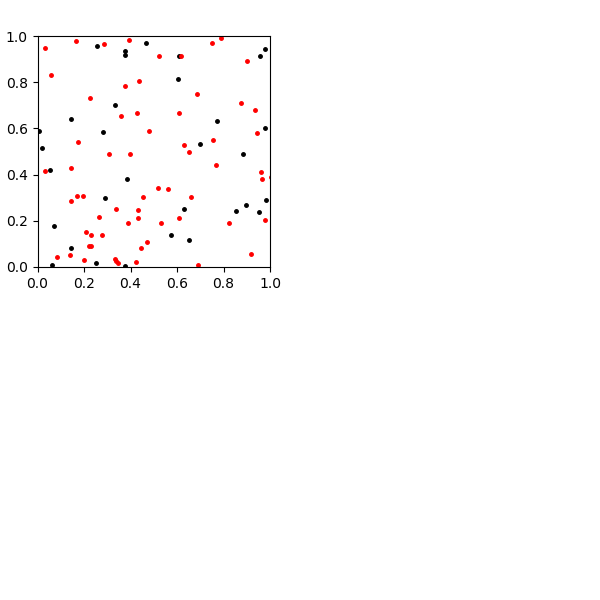

IndexError: index 2 is out of bounds for axis 0 with size 2

In [14]:
%matplotlib notebook

n_animals = 100
n_steps = 200
vmin = 0.01
vmax = 0.05
trap_size = 0.8 # All critters with x<this and y<this will be considred "captured"

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)

# Capture
color = np.where(np.logical_and(x<trap_size , y<trap_size), 1, 0) # All captured are color1, all free ones are color0
n_marked = np.sum(color)

estimation = np.zeros(n_steps) # At every point in time
                                # .. we'll remember the estimation for N an ecologist could have made 

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for i in range(n_steps): #loop through 
    for t in range(n_steps):
        # Moving elks around
        x += vx
        y += vy

        vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
        vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

        # Recapture
        n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
        n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
        estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator

        hist_estimate[i] = (hist_estimate[i]+estimation[i])/n_steps #border
        
        ax.clear()
        plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
        plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.canvas.draw() # <--------------- The main command to make it move
        #time.sleep(0.5)
    
plt.figure()
plt.plot(estimation)
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles')
plt.title('Average Estimate vs Time: Border Trapped');